In [115]:
#przyklad weak supervised algorithm

In [116]:
import tensorflow as tf

In [117]:
import numpy as np

In [118]:
import matplotlib.pyplot as plt

In [119]:
%matplotlib inline

In [120]:
from sklearn.utils import shuffle

In [121]:
import Io_tf_binary_general as io

In [122]:
#utworze teraz dane jakies
#tutaj zachecam do machania tymi domyslnymi wartosciami. Tu niestety tego nie narysowalem, ale 
# to tworzy takie wlasnie kolko w kolku na plaszczyxnie.
def kolko_w_kolku(klasa,sig1=0.4,sig2=0.25,R2=0.8,N=1000):
    """to ma utworzyc dane ktore posluza mi do sprawdzenia czy i jak dziala model
    klasa to 0 lub 1"""
    
    if klasa==1:
        x=np.random.normal(0,sig1)
        y=np.random.normal(0,sig1)
        #features.append([x,y])
        return {"pierwsza":x,"inna_wlasnosc":y}
    else:
        alpha=np.random.uniform()*2*np.pi
        delr=np.random.normal(0,sig2)
        r=R2+delr
        x=np.cos(alpha)*r
        y=np.sin(alpha)*r
        #features.append([x,y])
        return {"pierwsza":x,"inna_wlasnosc":y}

In [123]:
p0_train=0.3
p1_train=0.7
p0_validate=0.2
p1_validate=0.8
#to pierwse to prawdopodobienstwo, ze cos z pierwszej populacji jest naprawdę 1
# to drugie to prawdopodobiensto, ze cos z drugiej populacji jest naprawde 1

In [124]:
"""Tworze datasety ktore odpowiadaja koejno danym treningowym skladajacym sie
 z labelek takich, ze jak jakas wskazuje 0 to z prawdopodobienstwem 0.3 jednak jest jedynka (rozpadem
 higgsa), zas jak wskazuje 1 to z prawdopodobienstwem 0.7 jest rzeczywiscie rozpadem. To teraz pisalem o 
 tym datascie "weak_train". potem tworze jeszcze weak_validate ktory jest mniejszy ale idea jest taka,
 ze na weak_validate znamy skad inond te prawdopodobienstwa, a na weak_train nie znamy ich.
 weak_true tworze tylko po to, by moc sprawdzic, czy policzona auc na danych weak_validate zgodnie
 z ta praca ktora na poczatku nam przesylal Kalinowski o weak supervised learning zgadza sie
 z rzeczywistoscia"""

'Tworze datasety ktore odpowiadaja koejno danym treningowym skladajacym sie\n z labelek takich, ze jak jakas wskazuje 0 to z prawdopodobienstwem 0.3 jednak jest jedynka (rozpadem\n higgsa), zas jak wskazuje 1 to z prawdopodobienstwem 0.7 jest rzeczywiscie rozpadem. To teraz pisalem o \n tym datascie "weak_train". potem tworze jeszcze weak_validate ktory jest mniejszy ale idea jest taka,\n ze na weak_validate znamy skad inond te prawdopodobienstwa, a na weak_train nie znamy ich.\n weak_true tworze tylko po to, by moc sprawdzic, czy policzona auc na danych weak_validate zgodnie\n z ta praca ktora na poczatku nam przesylal Kalinowski o weak supervised learning zgadza sie\n z rzeczywistoscia'

In [125]:
pisacz=io.Io_tf_binary_general("weak_train",'w')
for i in range(10000):
    klasa=np.random.randint(0,2)
    if klasa==0:
        prawdziwa=int(np.random.uniform()<p0_train)
        pisacz.write_old(kolko_w_kolku(prawdziwa),0)
    else:
        prawdziwa=int(np.random.uniform()<p1_train)
        pisacz.write_old(kolko_w_kolku(prawdziwa),1)
pisacz.close()

In [126]:
pisacz=io.Io_tf_binary_general("weak_validate",'w')
for i in range(1000):
    klasa=np.random.randint(0,2)
    if klasa==0:
        prawdziwa=int(np.random.uniform()<p0_validate)
        pisacz.write_old(kolko_w_kolku(prawdziwa),0)
    else:
        prawdziwa=int(np.random.uniform()<p1_validate)
        pisacz.write_old(kolko_w_kolku(prawdziwa),1)
pisacz.close()

In [127]:
pisacz=io.Io_tf_binary_general("weak_true",'w')
for i in range(1000):
    klasa=np.random.randint(0,2)
    if klasa==0:
        prawdziwa=klasa
        pisacz.write_old(kolko_w_kolku(prawdziwa),0)
    else:
        prawdziwa=klasa
        pisacz.write_old(kolko_w_kolku(prawdziwa),1)
pisacz.close()

In [128]:
czytacz=io.Io_tf_binary_general("weak_validate",'r')
dataset=czytacz.read()
BATCH_SIZE=2
zbachowany=dataset.shuffle(1000).repeat().batch(BATCH_SIZE)
iterator = zbachowany.make_one_shot_iterator()
para=iterator.get_next()

with tf.Session() as sess:
    for i in range(3):
        print(sess.run(para))

{'pierwsza': FixedLenFeature(shape=[1], dtype=tf.float32, default_value=None), 'inna_wlasnosc': FixedLenFeature(shape=[1], dtype=tf.float32, default_value=None), 'label': FixedLenFeature(shape=[], dtype=tf.int64, default_value=None)}
({'inna_wlasnosc': array([[0.01871899],
       [0.67912114]], dtype=float32), 'pierwsza': array([[ 0.7663631],
       [-0.597269 ]], dtype=float32)}, array([0, 0]))
({'inna_wlasnosc': array([[ 0.07709967],
       [-0.4335302 ]], dtype=float32), 'pierwsza': array([[ 0.02003854],
       [-0.2542381 ]], dtype=float32)}, array([1, 1]))
({'inna_wlasnosc': array([[0.8000496 ],
       [0.31222752]], dtype=float32), 'pierwsza': array([[0.12371669],
       [0.48088732]], dtype=float32)}, array([0, 0]))


In [129]:

import Dnn_uniwersalny as dnn

In [130]:
model=dnn.Dnn_uniwersalny("weak_train",[10],"weak_estimator")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'weak_estimator', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5c09fb4588>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [131]:
model.train() #trenujemy na "weak_train"

{'pierwsza': FixedLenFeature(shape=[1], dtype=tf.float32, default_value=None), 'inna_wlasnosc': FixedLenFeature(shape=[1], dtype=tf.float32, default_value=None), 'label': FixedLenFeature(shape=[], dtype=tf.int64, default_value=None)}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from weak_estimator/model.ckpt-84000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 84001 into weak_estimator/model.ckpt.
INFO:tensorflow:loss = 87.55113, step = 84001
INFO:tensorflow:global_step/sec: 136.328
INFO:tensorflow:loss = 85.62128, step = 84101 (0.736 sec)
INFO:tensorflow:global_step/sec: 165.244
INFO:tensorflow:loss = 85.56856, step = 84201 (0.603 sec)
INFO:tensorflow:global_step/sec: 182.69
INFO:tensorflow:loss = 88.04332, step = 84301 (0.552 sec)
INFO:tensorflow:global_step/sec: 157

{'pierwsza': FixedLenFeature(shape=[1], dtype=tf.float32, default_value=None), 'inna_wlasnosc': FixedLenFeature(shape=[1], dtype=tf.float32, default_value=None), 'label': FixedLenFeature(shape=[], dtype=tf.int64, default_value=None)}
{'pierwsza': FixedLenFeature(shape=[1], dtype=tf.float32, default_value=None), 'inna_wlasnosc': FixedLenFeature(shape=[1], dtype=tf.float32, default_value=None), 'label': FixedLenFeature(shape=[], dtype=tf.int64, default_value=None)}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from weak_estimator/model.ckpt-87000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
auc wynosi 0.8032394949831082


0.8032394949831082

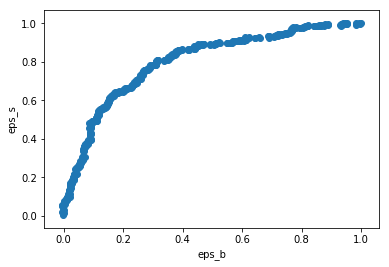

In [132]:
auc,xxxx,yyyy,zzz=model.evaluate_jak_z_pracy(0.2,0.8,folder="weak_validate")
auc #auc policzona na weak_validate zgodnie z praca 

In [133]:
model.evaluate(folder="weak_true")
    #auc policzona zgodnie z tym, jak to sie liczy normalnie gdy ma sie dobrze oznaczone dane gdzie
    # na pewno byl higgs lub na pewno nie bylo

{'pierwsza': FixedLenFeature(shape=[1], dtype=tf.float32, default_value=None), 'inna_wlasnosc': FixedLenFeature(shape=[1], dtype=tf.float32, default_value=None), 'label': FixedLenFeature(shape=[], dtype=tf.int64, default_value=None)}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-13-20:48:42
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from weak_estimator/model.ckpt-87000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-05-13-20:48:49


{'accuracy': 0.748,
 'accuracy_baseline': 0.51199996,
 'auc': 0.82006836,
 'auc_precision_recall': 0.82650983,
 'average_loss': 0.6010167,
 'label/mean': 0.488,
 'loss': 76.93014,
 'precision': 0.73505974,
 'prediction/mean': 0.50229514,
 'recall': 0.75614756,
 'global_step': 87000}

In [134]:
"""Tutaj nalezy zwrocic swoja uwage na to, ze auc policzone na danych co do ktorych wiemy dokladnie czy
sa rozpadem czy nie jest podobne do auc policzonego na podstawie labelek co do ktorych znamy tylko prawdopodobienstwo
czy sa rozpadem"""
    

'Tutaj nalezy zwrocic swoja uwage na to, ze auc policzone na danych co do ktorych wiemy dokladnie czy\nsa rozpadem czy nie jest podobne do auc policzonego na podstawie labelek co do ktorych znamy tylko prawdopodobienstwo\nczy sa rozpadem'